# Task 7 Level 3

**Time Series Breakdown of Walmart Retail Sales**

Dataset: `train.csv` (Walmart Sales Forecasting)

**Covered Topics:** Time series analysis • Trend & seasonality • Visualization over time • Simple forecasting (rolling mean, exponential smoothing)

## 1) Imports & Settings

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




## 2) Load Dataset

In [7]:
df=pd.read_csv("train.csv")
df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


## 3) Basic Cleaning & Type Conversion

In [8]:
# Inspect columns
df.info()

# The Kaggle Walmart train.csv typically has: Store, Dept, Date, Weekly_Sales, IsHoliday
# Convert Date to datetime, standardize column names for convenience
expected_cols = ['Store','Dept','Date','Weekly_Sales']
missing = [c for c in expected_cols if c not in df.columns]
if missing:
    print('Note: Missing expected columns:', missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [9]:
# Convert date
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
# Ensure numeric
df['Weekly_Sales'] = pd.to_numeric(df['Weekly_Sales'], errors='coerce')

In [11]:
# Drop rows with missing sales or date
df = df.dropna(subset=['Date','Weekly_Sales']).copy()

In [12]:
# Sort by date to make time operations safer
df = df.sort_values('Date').reset_index(drop=True)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,29,5,2010-02-05,15552.08,False
2,29,6,2010-02-05,3200.22,False
3,29,7,2010-02-05,10820.05,False
4,29,8,2010-02-05,20055.64,False


## 4) Create Monthly Aggregations

In [13]:
# Although the dataset is weekly, we will aggregate to monthly totals for smoother trends.
df['YearMonth'] = df['Date'].dt.to_period('M').dt.to_timestamp()

monthly_total = df.groupby('YearMonth', as_index=False)['Weekly_Sales'].sum()
monthly_total.rename(columns={'Weekly_Sales':'Monthly_Sales'}, inplace=True)

# Per product (Dept) & per region (Store) monthly breakdowns
monthly_by_dept = df.groupby(['YearMonth','Dept'], as_index=False)['Weekly_Sales'].sum()
monthly_by_dept.rename(columns={'Weekly_Sales':'Monthly_Sales'}, inplace=True)

monthly_by_store = df.groupby(['YearMonth','Store'], as_index=False)['Weekly_Sales'].sum()
monthly_by_store.rename(columns={'Weekly_Sales':'Monthly_Sales'}, inplace=True)

monthly_total.head()


,YearMonth,Monthly_Sales
0,2010-02-01,1.903330e+08
1,2010-03-01,1.819198e+08
2,2010-04-01,2.314124e+08
3,2010-05-01,1.867109e+08
4,2010-06-01,1.922462e+08


## 5) Overall Monthly Sales Trend

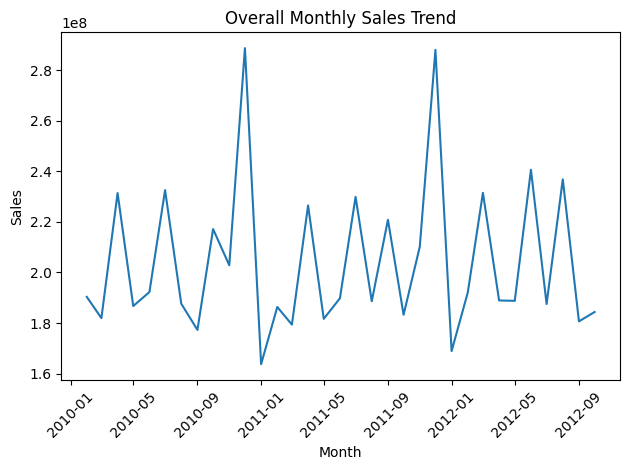

In [14]:
plt.figure()
plt.plot(monthly_total['YearMonth'], monthly_total['Monthly_Sales'])
plt.title('Overall Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 6) Moving Averages (3-Month & 12-Month)

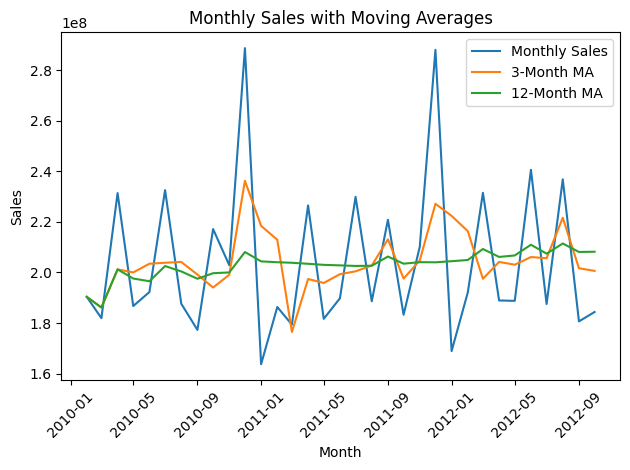

In [15]:
monthly_ma = monthly_total.copy()
monthly_ma['MA_3'] = monthly_ma['Monthly_Sales'].rolling(window=3, min_periods=1).mean()
monthly_ma['MA_12'] = monthly_ma['Monthly_Sales'].rolling(window=12, min_periods=1).mean()

plt.figure()
plt.plot(monthly_ma['YearMonth'], monthly_ma['Monthly_Sales'], label='Monthly Sales')
plt.plot(monthly_ma['YearMonth'], monthly_ma['MA_3'], label='3-Month MA')
plt.plot(monthly_ma['YearMonth'], monthly_ma['MA_12'], label='12-Month MA')
plt.title('Monthly Sales with Moving Averages')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## 7) Seasonal Pattern — Average Sales by Calendar Month

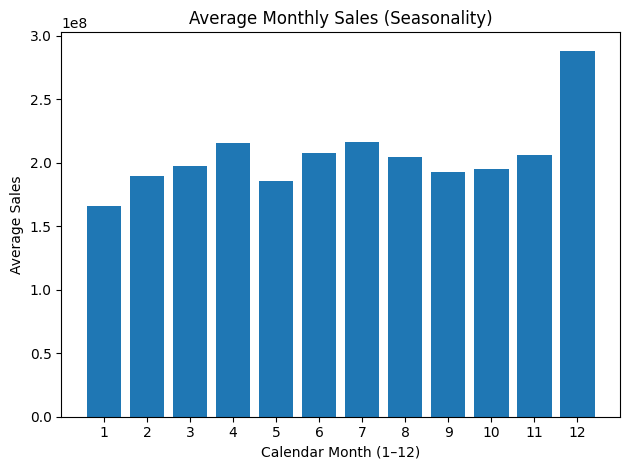

,Month,Monthly_Sales
0,1,1.662992e+08
1,2,1.895760e+08
2,3,1.975953e+08
3,4,2.156199e+08
4,5,1.857085e+08
5,6,2.075433e+08
6,7,2.166670e+08
7,8,2.043634e+08
8,9,1.929204e+08
9,10,1.949283e+08


In [16]:
# Compute average sales for each calendar month across years
monthly_total['Month'] = monthly_total['YearMonth'].dt.month
avg_by_month = monthly_total.groupby('Month', as_index=False)['Monthly_Sales'].mean()

# Bar chart of average sales by month
plt.figure()
plt.bar(avg_by_month['Month'], avg_by_month['Monthly_Sales'])
plt.title('Average Monthly Sales (Seasonality)')
plt.xlabel('Calendar Month (1–12)')
plt.ylabel('Average Sales')
plt.xticks(range(1,13))
plt.tight_layout()
plt.show()

avg_by_month.sort_values('Month').reset_index(drop=True)


## 8) Breakdown Over Time — Top 5 Products (Depts)

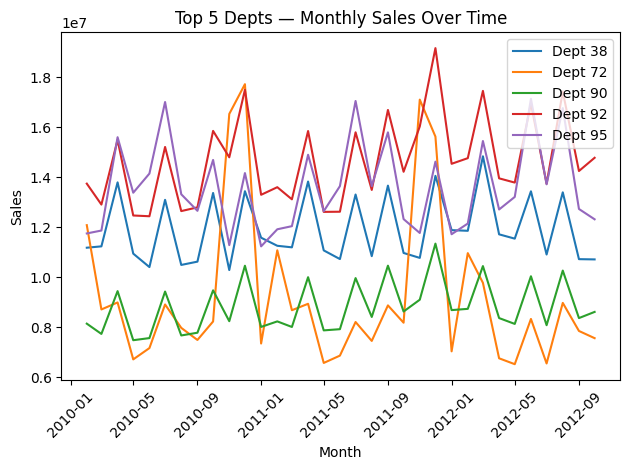

Dept,38,72,90,92,95
YearMonth,,,,,
2012-06-01,13435245.47,8329348.46,10037228.91,16952187.76,17135419.23
2012-07-01,10907452.79,6549226.41,8079847.64,13736908.39,13715513.63
2012-08-01,13394372.33,8971668.88,10264524.41,17426976.27,16764230.22
2012-09-01,10721469.82,7849142.42,8364474.71,14247589.45,12728891.71
2012-10-01,10711353.12,7561081.48,8611420.22,14776486.78,12315979.20


In [17]:
# Compute total sales by Dept and pick top 5
dept_totals = monthly_by_dept.groupby('Dept', as_index=False)['Monthly_Sales'].sum()
top5_depts = dept_totals.sort_values('Monthly_Sales', ascending=False).head(5)['Dept'].tolist()

subset_dept = monthly_by_dept[monthly_by_dept['Dept'].isin(top5_depts)]
pivot_dept = subset_dept.pivot(index='YearMonth', columns='Dept', values='Monthly_Sales').fillna(0)

plt.figure()
for col in pivot_dept.columns:
    plt.plot(pivot_dept.index, pivot_dept[col], label=f'Dept {col}')
plt.title('Top 5 Depts — Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

pivot_dept.tail()


## 9) Breakdown Over Time — Top 5 Regions (Stores)

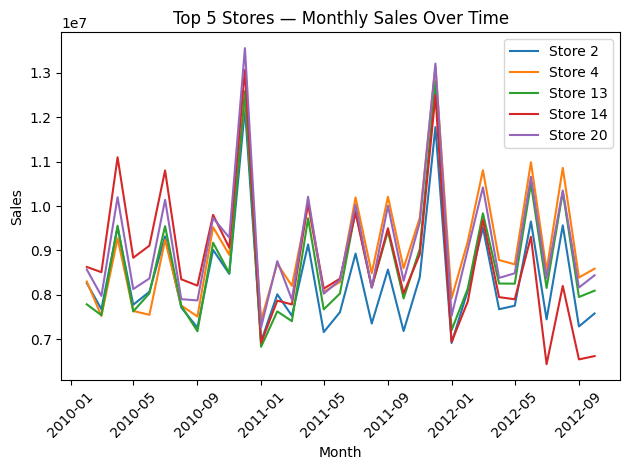

Store,2,4,13,14,20
YearMonth,,,,,
2012-06-01,9652012.49,10984471.62,10502135.11,9306898.95,10656790.31
2012-07-01,7449172.87,8548929.23,8155251.19,6439316.12,8374464.81
2012-08-01,9564712.06,10857845.15,10314251.00,8201073.31,10351645.31
2012-09-01,7289469.93,8390018.08,7951757.11,6547171.22,8165416.86
2012-10-01,7581514.93,8589722.81,8094197.99,6621810.11,8440377.29


In [18]:
# The train.csv file does not include geographic regions, so we use Store as a proxy for region.
store_totals = monthly_by_store.groupby('Store', as_index=False)['Monthly_Sales'].sum()
top5_stores = store_totals.sort_values('Monthly_Sales', ascending=False).head(5)['Store'].tolist()

subset_store = monthly_by_store[monthly_by_store['Store'].isin(top5_stores)]
pivot_store = subset_store.pivot(index='YearMonth', columns='Store', values='Monthly_Sales').fillna(0)

plt.figure()
for col in pivot_store.columns:
    plt.plot(pivot_store.index, pivot_store[col], label=f'Store {col}')
plt.title('Top 5 Stores — Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

pivot_store.tail()


## 10) Simple Forecasting — Rolling Mean & Exponential Smoothing

In [22]:
# We'll create a simple 12-month rolling-mean forecast and a Simple Exponential Smoothing (SES) forecast.
# Forecast horizon
h = 6  # months

series = monthly_total.set_index('YearMonth')['Monthly_Sales'].asfreq('MS')  # monthly start frequency

# --- Rolling Mean Forecast (12-month) ---
roll_window = 12
rolling_mean = series.rolling(window=roll_window, min_periods=1).mean()
last_roll = rolling_mean.iloc[-1]
roll_forecast_index = pd.date_range(series.index[-1] + pd.offsets.MonthBegin(), periods=h, freq='MS')
roll_forecast = pd.Series([last_roll]*h, index=roll_forecast_index)


# Display numeric forecast tables
print('Rolling Mean Forecast (next 6 months):')
display(roll_forecast.to_frame('Forecast'))




Rolling Mean Forecast (next 6 months):


,Forecast
2012-11-01,2.081978e+08
2012-12-01,2.081978e+08
2013-01-01,2.081978e+08
2013-02-01,2.081978e+08
2013-03-01,2.081978e+08
2013-04-01,2.081978e+08


In [20]:
# --- Simple Exponential Smoothing (manual) ---
alpha = 0.3
ses = pd.Series(index=series.index, dtype='float64')
level = series.iloc[0]
ses.iloc[0] = level
for t in range(1, len(series)):
    level = alpha * series.iloc[t] + (1 - alpha) * level
    ses.iloc[t] = level
# Forecast future points using the last level (no trend/seasonality)
ses_forecast_index = pd.date_range(series.index[-1] + pd.offsets.MonthBegin(), periods=h, freq='MS')
ses_forecast = pd.Series([level]*h, index=ses_forecast_index)

print('\nSimple Exponential Smoothing Forecast (next 6 months):')
display(ses_forecast.to_frame('Forecast'))


Simple Exponential Smoothing Forecast (next 6 months):


,Forecast
2012-11-01,1.984098e+08
2012-12-01,1.984098e+08
2013-01-01,1.984098e+08
2013-02-01,1.984098e+08
2013-03-01,1.984098e+08
2013-04-01,1.984098e+08


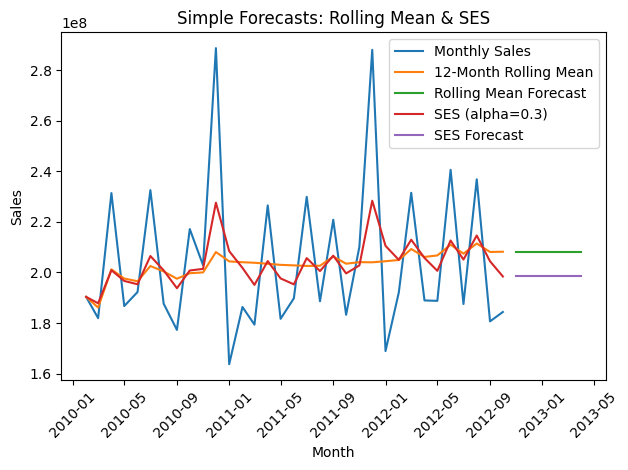

In [21]:
# Plot history + forecasts
plt.figure()
plt.plot(series.index, series.values, label='Monthly Sales')
plt.plot(rolling_mean.index, rolling_mean.values, label='12-Month Rolling Mean')
plt.plot(roll_forecast.index, roll_forecast.values, label='Rolling Mean Forecast')
plt.plot(ses.index, ses.values, label='SES (alpha=0.3)')
plt.plot(ses_forecast.index, ses_forecast.values, label='SES Forecast')
plt.title('Simple Forecasts: Rolling Mean & SES')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 11) Notes & Conclusions

- The dataset is weekly; we aggregated to monthly totals for trend/seasonality.
- "Region" is represented by `Store` because the train.csv file does not include geographic regions.
- Forecasts shown here are simple baselines (rolling mean and SES without trend/seasonality components).